**Problem Statement**


In this dataset, we have demographic and employment data of individuals, including details such as age, education, occupation, and marital status, among other features. The income level of these individuals is influenced by various personal and work-related factors. Understanding these factors is crucial for better decision-making, particularly for policy-making, financial services, and targeted interventions aimed at improving financial wellbeing.


**Dataset Description**

1. age: The age of the individual.
2. workclass: Type of employment (e.g., Private, Government, Self-Employed).
3. fnlwgt: Final sample weight, representing how many people the individual represents.
4. education: The highest level of education attained (e.g., Bachelors, HS-grad).
5. education-num: Numerical representation of education level.
6. marital-status: The marital status of the individual (e.g., Married, Never-married).
7. occupation: The individual’s occupation category (e.g., Exec-managerial, Craft-repair).
8. relationship: The relationship status within a family (e.g., Husband, Wife, Not-in-family).
9. race: The race of the individual (e.g., White, Black, Asian).
10. sex: Gender of the individual (Male, Female).
11. capital-gain: Capital gains from investments.
12. capital-loss: Losses from investments.
13. hours-per-week: The number of hours worked per week.
14. native-country: The country of origin for the individual.
15. income: Binary target variable representing whether the individual's income is greater than or less than $50,000 per year.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df1=pd.read_csv("adult_income.csv")
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df1.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Brief Conclusion of Dataset**

1. Age: The average age of individuals is approximately 38.6 years, with a minimum age of 17 and a maximum of 90. This suggests a diverse age distribution, with most individuals likely being in their working years.

2. Final Weight (fnlwgt): The mean final weight is around 189,778, indicating that the dataset represents a broad population. The substantial range (from 12,285 to 1,484,705) suggests significant variability in how individuals represent the overall population.

3. Education Level: The average education level (measured by education.num) is approximately 10.1, which corresponds to some college education or high school graduation. The range from 1 (less than high school) to 16 (Doctorate) indicates a wide educational spectrum.

4. Capital Gains and Losses: The mean capital gain is relatively low at about 1,077.6, while the maximum observed value is quite high (99,999), indicating that a small number of individuals have significant capital gains. Conversely, capital losses have a mean of 87.3, with most individuals reporting zero losses, suggesting that capital losses are not common.

5. Hours Worked Per Week: The average number of hours worked per week is about 40.4, which aligns with standard full-time work hours. The minimum of 1 hour suggests that some individuals work part-time or are in unusual employment situations, while the maximum of 99 hours indicates extreme cases of overwork.

**UNIVARIATE** **ANALYSIS**

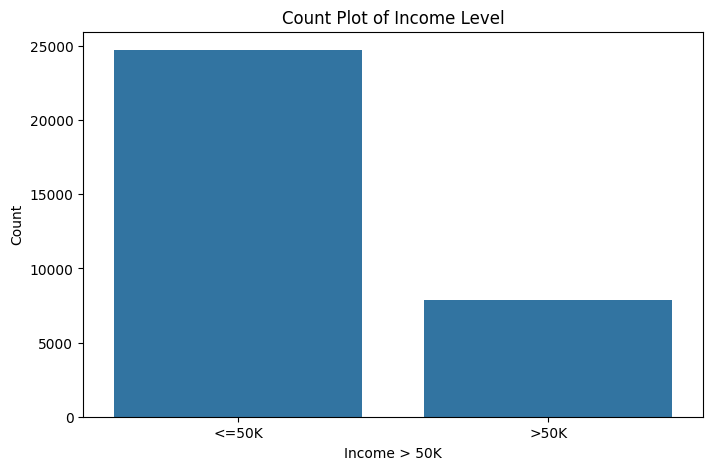

In [ ]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df1, x='income')
plt.title('Count Plot of Income Level')
plt.xlabel('Income > 50K')
plt.ylabel('Count')

plt.show()


**Conclusion from Count Plot of Income Levels**

The count plot reveals that a significant majority of individuals in the dataset earn less than $50K, while fewer earn more than $50K. This suggests a prevalence of lower income levels among the population, indicating potential economic challenges for a substantial portion of individuals. Understanding the factors contributing to this distribution can inform targeted interventions aimed at improving financial outcomes.

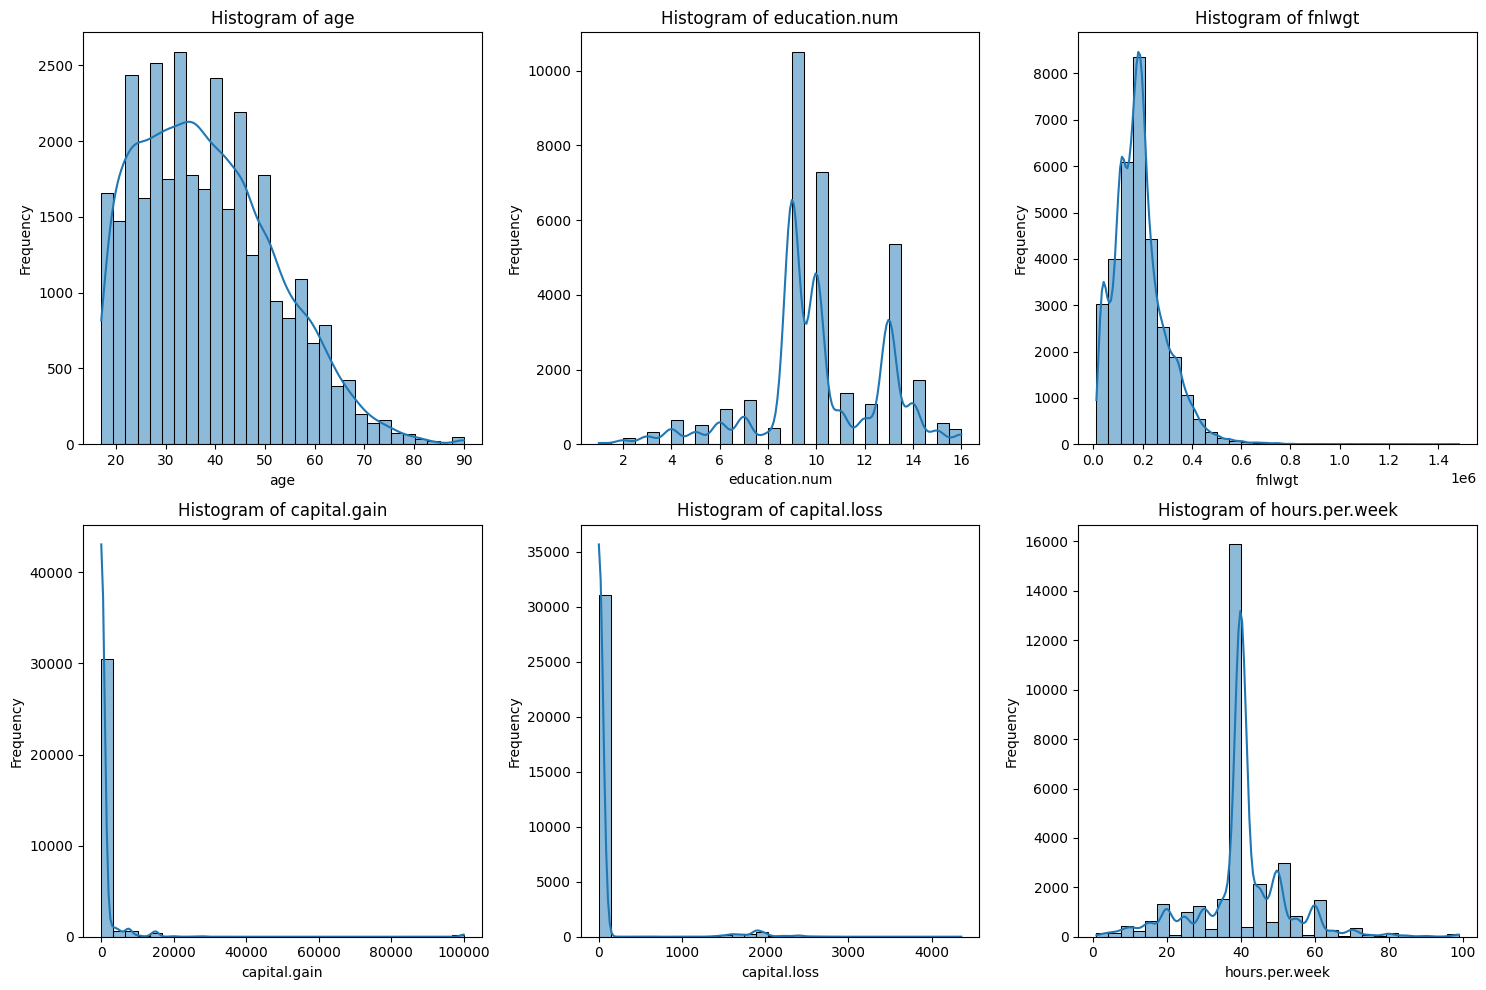

In [ ]:

plt.figure(figsize=(15, 10))

num_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)  # Create a grid of 2 rows and 3 columns
    sns.histplot(df1[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**Conclusion from Histograms of Numerical Variables**

The histograms of numerical variables indicate the following trends:

Age: The age distribution is roughly bell-shaped, with most individuals concentrated between their late 20s and late 40s, suggesting a mature workforce.

Income: The income histogram aligns with the earlier findings, with a clear distinction between those earning less than $50K and a smaller group earning more, reflecting economic disparity.

Education Level: The education level shows a peak around high school and some college, indicating a diverse educational background among individuals.

Capital Gains: There is a drastic decrease in the frequency of capital gains, with most individuals reporting low or zero gains. A few outliers contribute to high capital gains, suggesting that substantial returns are uncommon.

Capital Losses: Similar to capital gains, capital losses are predominantly zero, with only a few instances of higher losses, indicating that losses are infrequent and concentrated among a small group.

**Box Plot For Anomalies**

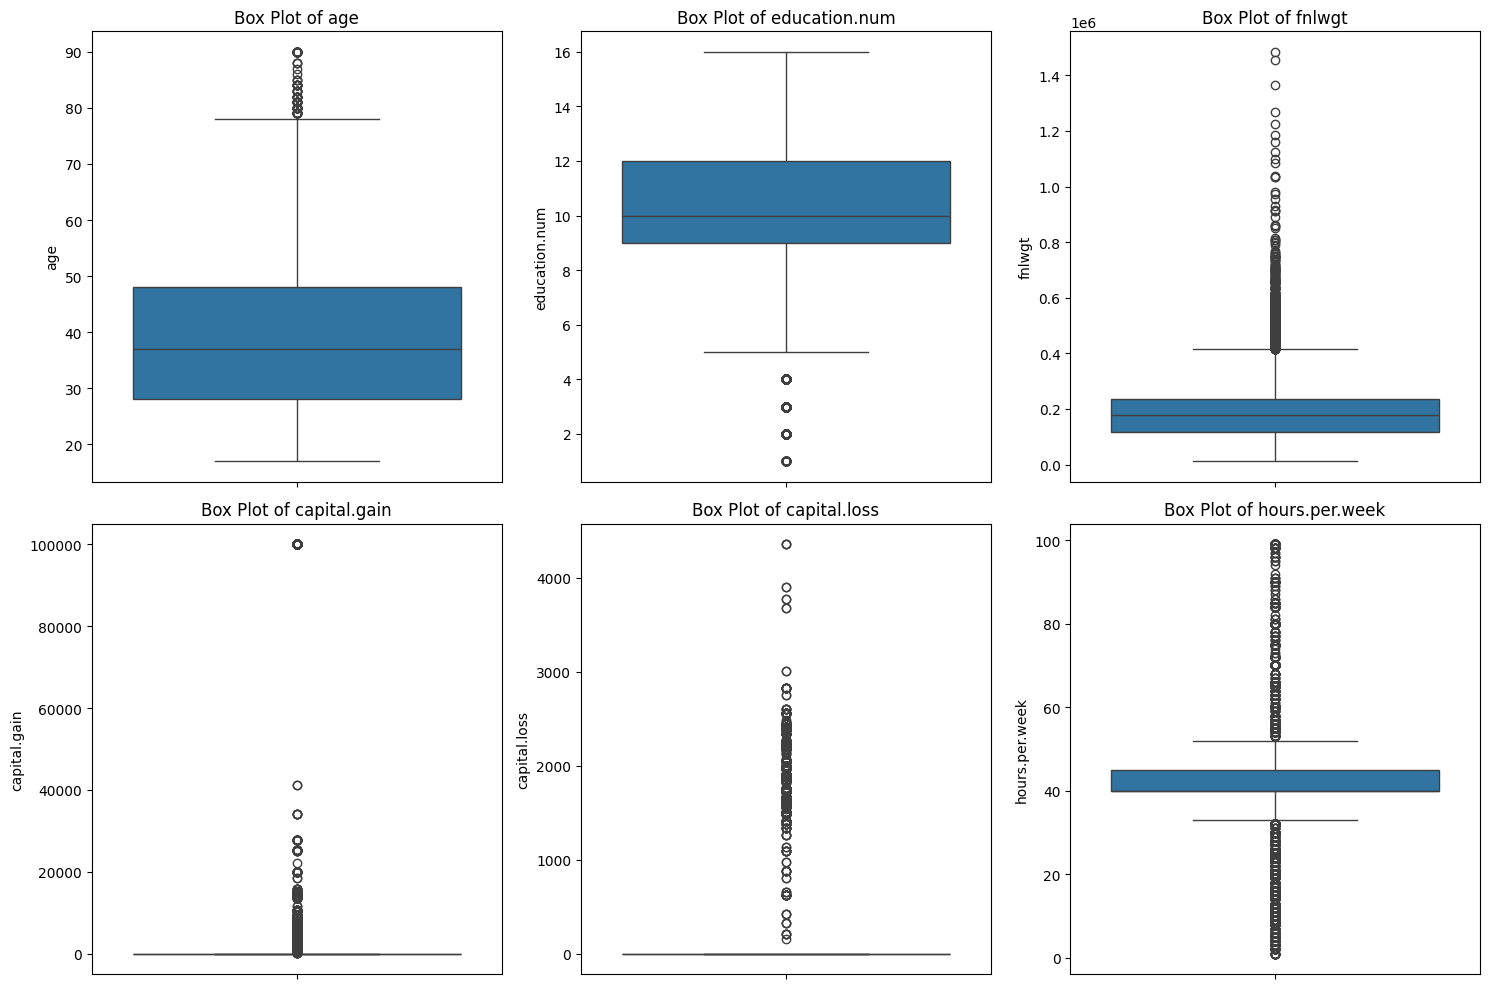

In [ ]:
plt.figure(figsize=(15, 10))

num_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df1, y=var)
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


**Conclusion from Box Plots**



---


The box plots reveal several key insights about the numerical variables:

Age: The age box plot shows a range from 17 to 90, with a median around 37. There are some outliers, but most individuals fall within a typical working age, suggesting a stable workforce.

Education Level: The box plot for education level indicates that most individuals have completed high school or some college. There are few outliers with very high education levels, suggesting a small proportion of individuals with advanced degrees.

Capital Gains: The capital gains box plot highlights a significant concentration of individuals reporting zero gains, with a few outliers showing extreme values. This indicates that while a few individuals benefit from high capital gains, the majority do not engage in significant investment activities.

Capital Losses: Similar to capital gains, the capital losses box plot shows most individuals reporting zero losses, with a small number experiencing high losses. This reinforces the idea that capital loss events are infrequent.

Hours Worked per Week: The box plot for hours worked shows a median around 40 hours, with most individuals working between 35 and 50 hours. There are some outliers working very few or an exceptionally high number of hours, suggesting variability in employment situations.

In [ ]:
num_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

z_scores = np.abs((df1[num_vars] - df1[num_vars].mean()) / df1[num_vars].std())

threshold = 3

df_no_outliers = df1[(z_scores < threshold).all(axis=1)]

print(f"Original DataFrame shape: {df1.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (32561, 15)
DataFrame shape after removing outliers: (29828, 15)


**Outlier Removal Verification**

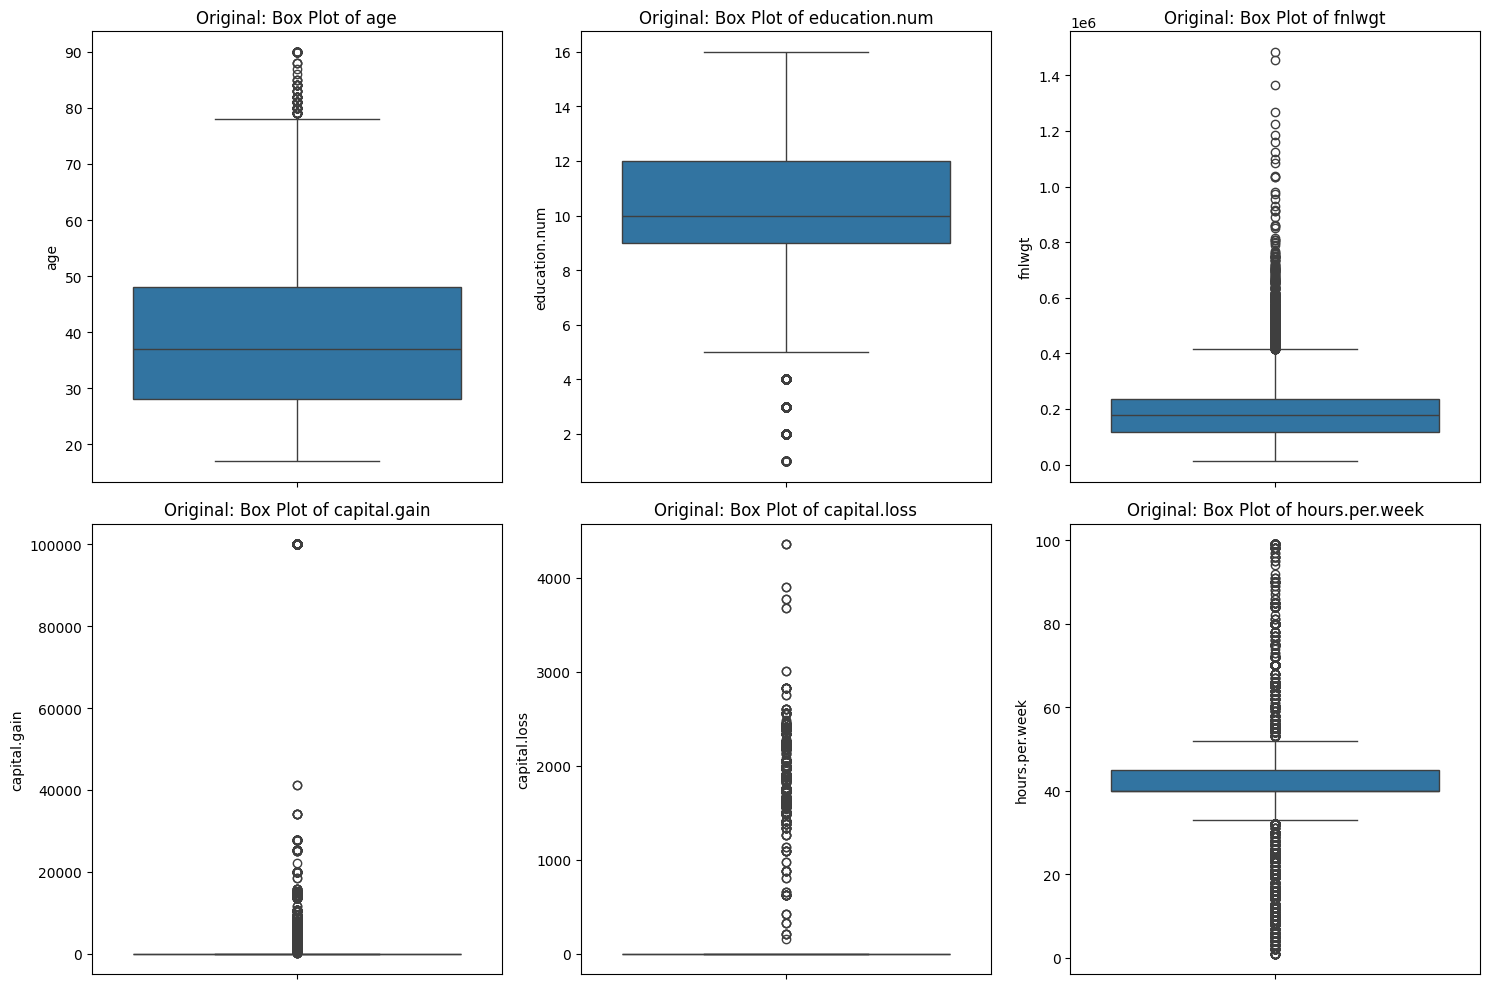

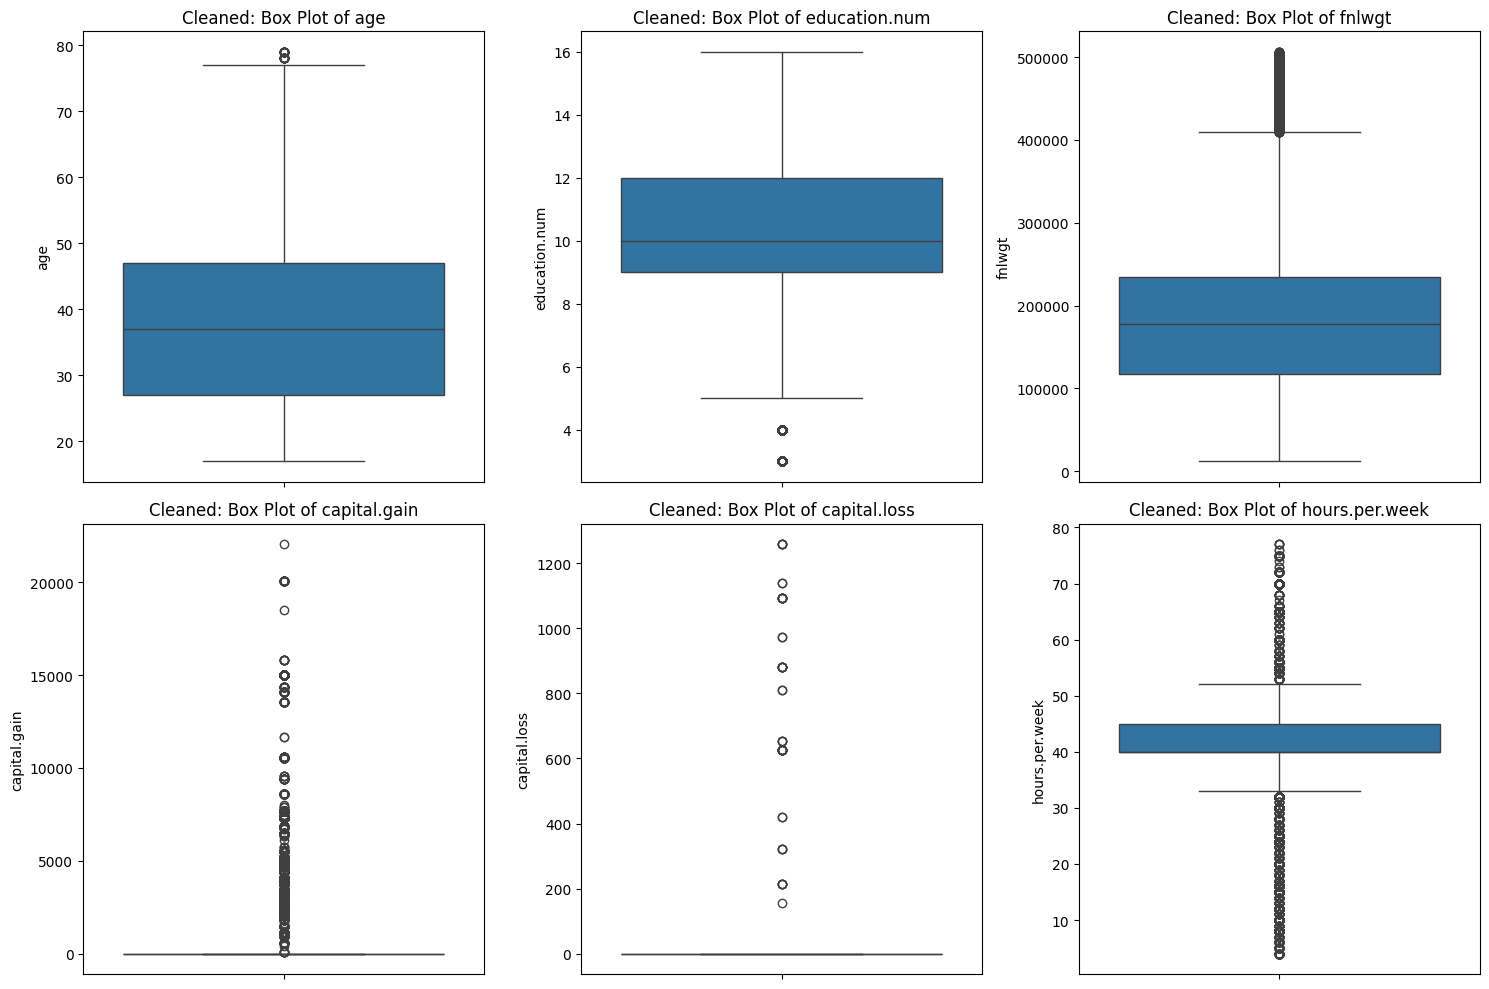

In [ ]:

num_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

z_scores = np.abs((df1[num_vars] - df1[num_vars].mean()) / df1[num_vars].std())
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

df_no_outliers = df1[~outliers]

plt.figure(figsize=(15, 10))

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df1, y=var)
    plt.title(f'Original: Box Plot of {var}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_no_outliers, y=var)
    plt.title(f'Cleaned: Box Plot of {var}')

plt.tight_layout()
plt.show()



**Conclusion from Z-Score Outlier Removal**


Using Z-score analysis to identify and remove outliers in the dataset yielded the following insights:

Outlier Detection: The Z-score method identified data points that significantly deviate from the mean (typically those with a Z-score greater than 3 or less than -3) across numerical variables.

Data Cleanliness: After applying the Z-score threshold, the dataset became cleaner, with outliers removed from variables such as age, education level, capital gains, capital losses, and hours worked. This helps in ensuring that the analysis and modeling are not skewed by extreme values.

Impact on Analysis: Removing outliers allows for a more accurate representation of the underlying trends in the data, making the statistical analyses more reliable. This is particularly important for regression modeling and predictive analyses, as outliers can disproportionately influence results.

Variable Distributions: The distributions of the remaining variables are now more normal, providing a better foundation for further statistical analysis and modeling.

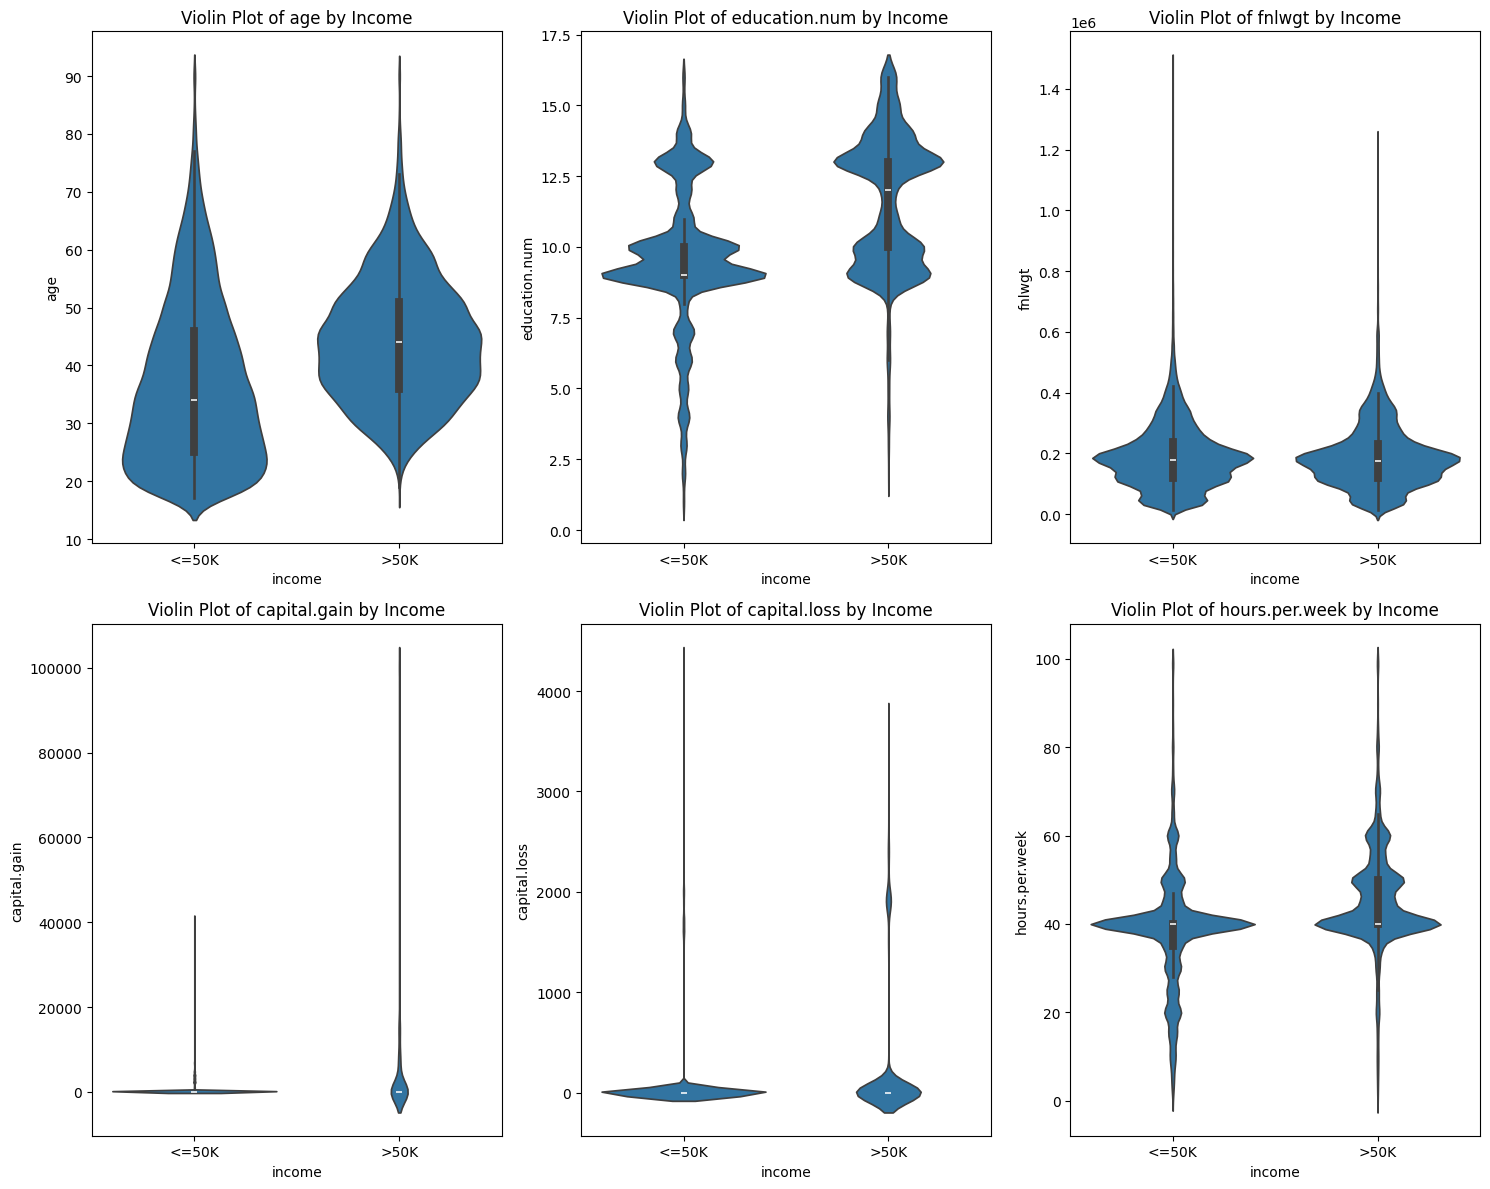

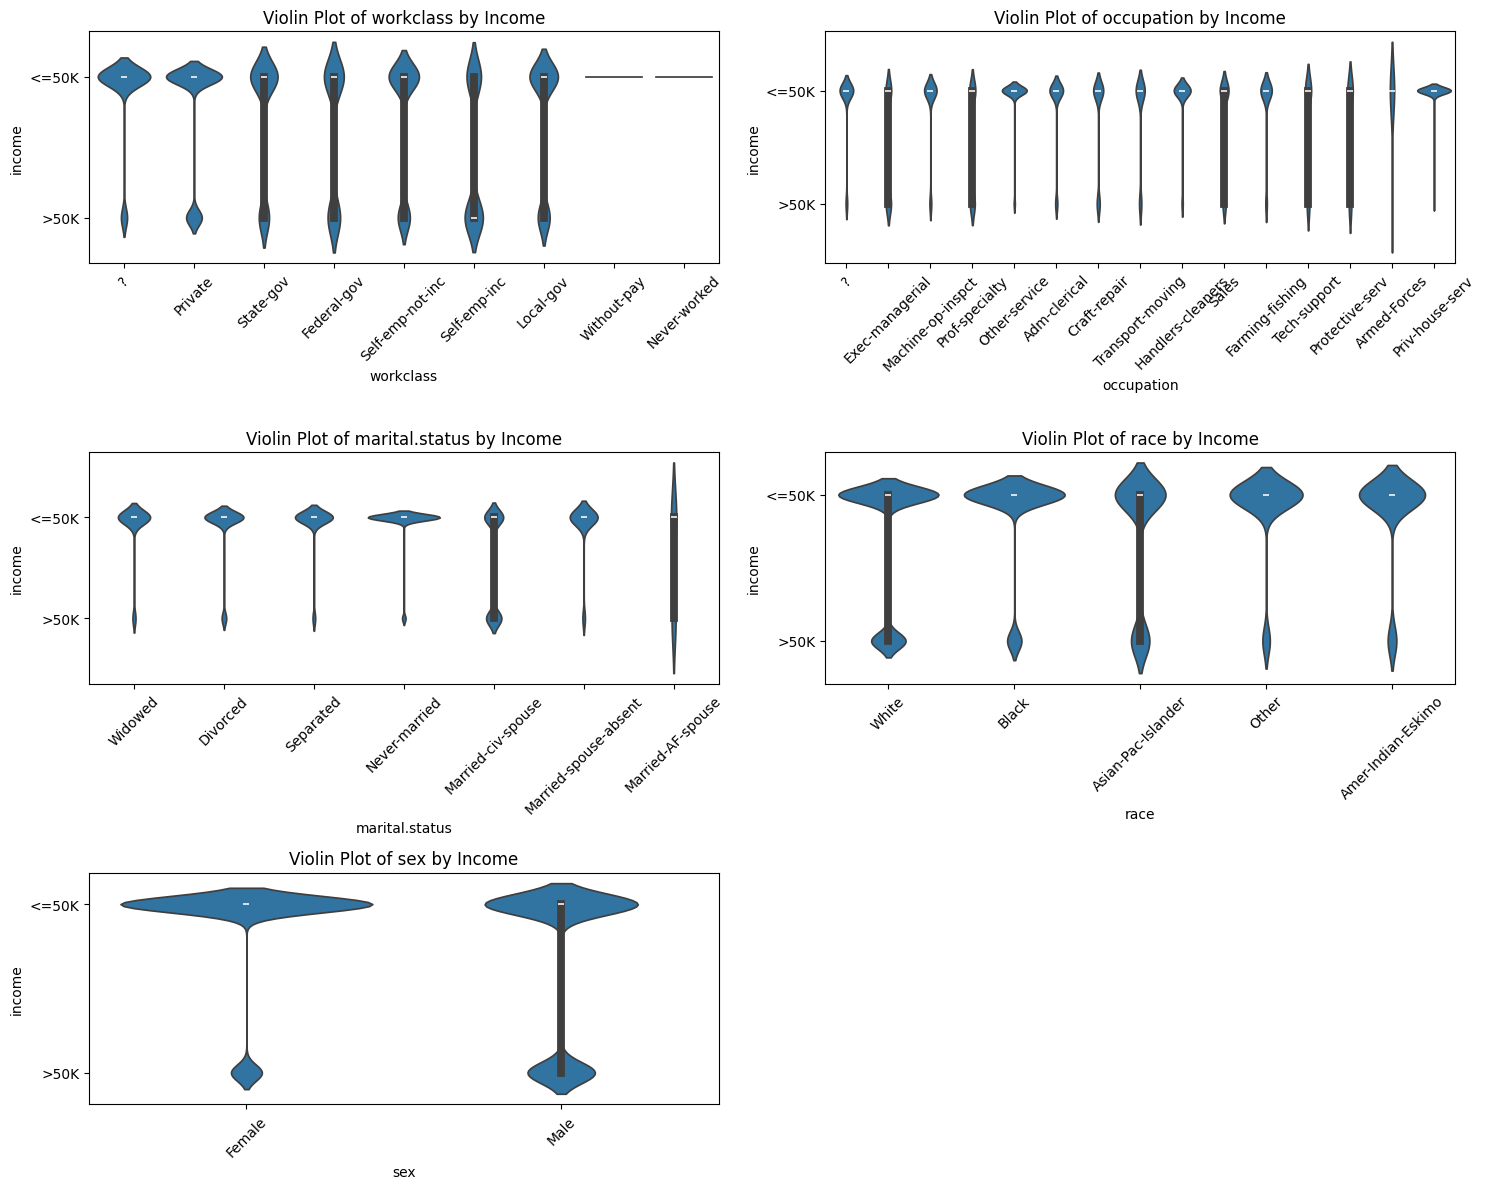

In [ ]:

plt.figure(figsize=(15, 12))

numerical_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

categorical_vars = ['workclass', 'occupation', 'marital.status', 'race', 'sex']

for i, num_var in enumerate(numerical_vars):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(data=df1, x='income', y=num_var)
    plt.title(f'Violin Plot of {num_var} by Income')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
for i, cat_var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(data=df1, x=cat_var, y='income')
    plt.title(f'Violin Plot of {cat_var} by Income')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**Conclusion from Violin Plots for Numerical and Categorical Variables**


Using the specified numerical and categorical variables in the violin plots provided the following insights:

Age: The age distribution among income groups shows that those earning less than $50K have a broader age range. Higher earners tend to be clustered around specific age ranges, suggesting that age may influence income stability.

Education Level (education.num): A clear distinction is visible, where individuals earning above $50K generally have higher education levels. This reinforces the notion that education significantly impacts earning potential.

Final Weight (fnlwgt): While less informative in terms of income comparison, the distribution indicates that the sample represents various segments of the population, but its direct correlation with income needs further exploration.

Capital Gains: Individuals earning more than $50K display a wider range of capital gains, whereas those earning less frequently report zero gains. This suggests that capital investment strategies may correlate with higher income levels.

Capital Losses: Similar to capital gains, most lower-income individuals report no capital losses, while higher earners show more variability, indicating differing financial behaviors.

Hours Worked per Week: The plot shows that those earning less than $50K often work varying hours, including part-time. In contrast, higher earners tend to work more consistent full-time hours, indicating a relationship between work hours and income level.

**Categorical Variables**


Workclass: Violin plots reveal that certain work classes, such as government jobs or self-employment, are more associated with higher incomes, while individuals in lower-paying sectors dominate the lower income category.

Occupation: The distribution indicates that managerial and professional occupations are more prevalent among higher earners, emphasizing the importance of job type in income level.

Marital Status: Individuals who are married or in partnerships tend to have higher incomes, highlighting the economic benefits of dual-income households.

Race: There may be disparities in income distribution across different racial groups, necessitating further investigation into socio-economic factors.

Sex: The plots suggest potential gender disparities in income, with males often represented in higher income brackets compared to females.

**Bar Plot to find Co-relation**





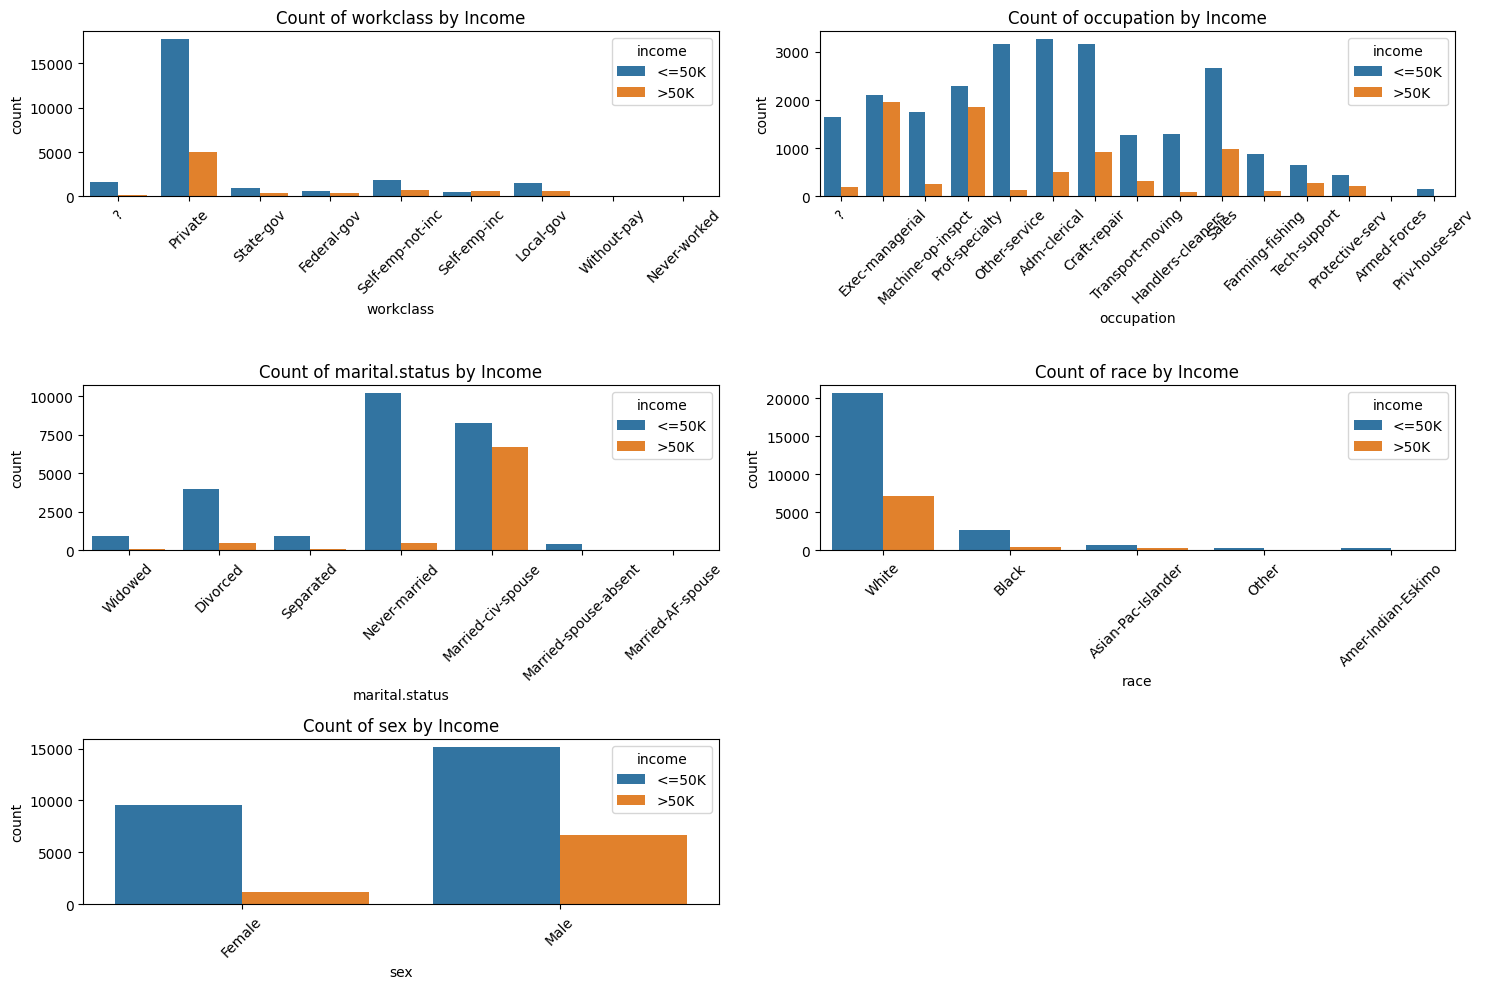

In [ ]:
plt.figure(figsize=(15, 10))

categorical_vars = ['workclass', 'occupation', 'marital.status', 'race', 'sex']
numerical_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

for i, cat_var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df1, x=cat_var, hue='income')
    plt.title(f'Count of {cat_var} by Income')
    plt.xticks(rotation=45)

# # Create bar plots for numerical variables
# plt.figure(figsize=(15, 10))
# for i, num_var in enumerate(numerical_vars):
#     plt.subplot(2, 3, i + 1)
#     sns.barplot(data=df1, x='income', y=num_var, estimator=np.mean)
#     plt.title(f'Average {num_var} by Income')

plt.tight_layout()
plt.show()


In [ ]:

df1['income_binary'] = df1['income'].apply(lambda x: 1 if x == '>50K' else 0)

occupation_groups = [group['income_binary'].values for name, group in df1.groupby('occupation')]
f_statistic_occupation, p_value_occupation = stats.f_oneway(*occupation_groups)

marital_status_groups = [group['income_binary'].values for name, group in df1.groupby('marital.status')]
f_statistic_marital, p_value_marital = stats.f_oneway(*marital_status_groups)

sex_groups = [group['income_binary'].values for name, group in df1.groupby('sex')]
f_statistic_sex, p_value_sex = stats.f_oneway(*sex_groups)

print("ANOVA Results:")
print(f"Occupation - F-statistic: {f_statistic_occupation}, P-value: {p_value_occupation}")
print(f"Marital Status - F-statistic: {f_statistic_marital}, P-value: {p_value_marital}")
print(f"Sex - F-statistic: {f_statistic_sex}, P-value: {p_value_sex}")


ANOVA Results:
Occupation - F-statistic: 328.54918709801683, P-value: 0.0
Marital Status - F-statistic: 1357.8598024082576, P-value: 0.0
Sex - F-statistic: 1593.107907446717, P-value: 0.0


In [ ]:
occupation_table = pd.crosstab(df1['occupation'], df1['income'])
chi2_statistic_occupation, p_value_occupation, dof_occupation, expected_occupation = chi2_contingency(occupation_table)

marital_status_table = pd.crosstab(df1['marital.status'], df1['income'])
chi2_statistic_marital, p_value_marital, dof_marital, expected_marital = chi2_contingency(marital_status_table)

sex_table = pd.crosstab(df1['sex'], df1['income'])
chi2_statistic_sex, p_value_sex, dof_sex, expected_sex = chi2_contingency(sex_table)

print("Chi-Square Test Results:")
print(f"Occupation - Chi-Squared Statistic: {chi2_statistic_occupation}, P-value: {p_value_occupation}, Degrees of Freedom: {dof_occupation}")
print(f"Marital Status - Chi-Squared Statistic: {chi2_statistic_marital}, P-value: {p_value_marital}, Degrees of Freedom: {dof_marital}")
print(f"Sex - Chi-Squared Statistic: {chi2_statistic_sex}, P-value: {p_value_sex}, Degrees of Freedom: {dof_sex}")


Chi-Square Test Results:
Occupation - Chi-Squared Statistic: 4031.974280247181, P-value: 0.0, Degrees of Freedom: 14
Marital Status - Chi-Squared Statistic: 6517.741653663022, P-value: 0.0, Degrees of Freedom: 6
Sex - Chi-Squared Statistic: 1517.813409134445, P-value: 0.0, Degrees of Freedom: 1


<Figure size 1200x1000 with 0 Axes>

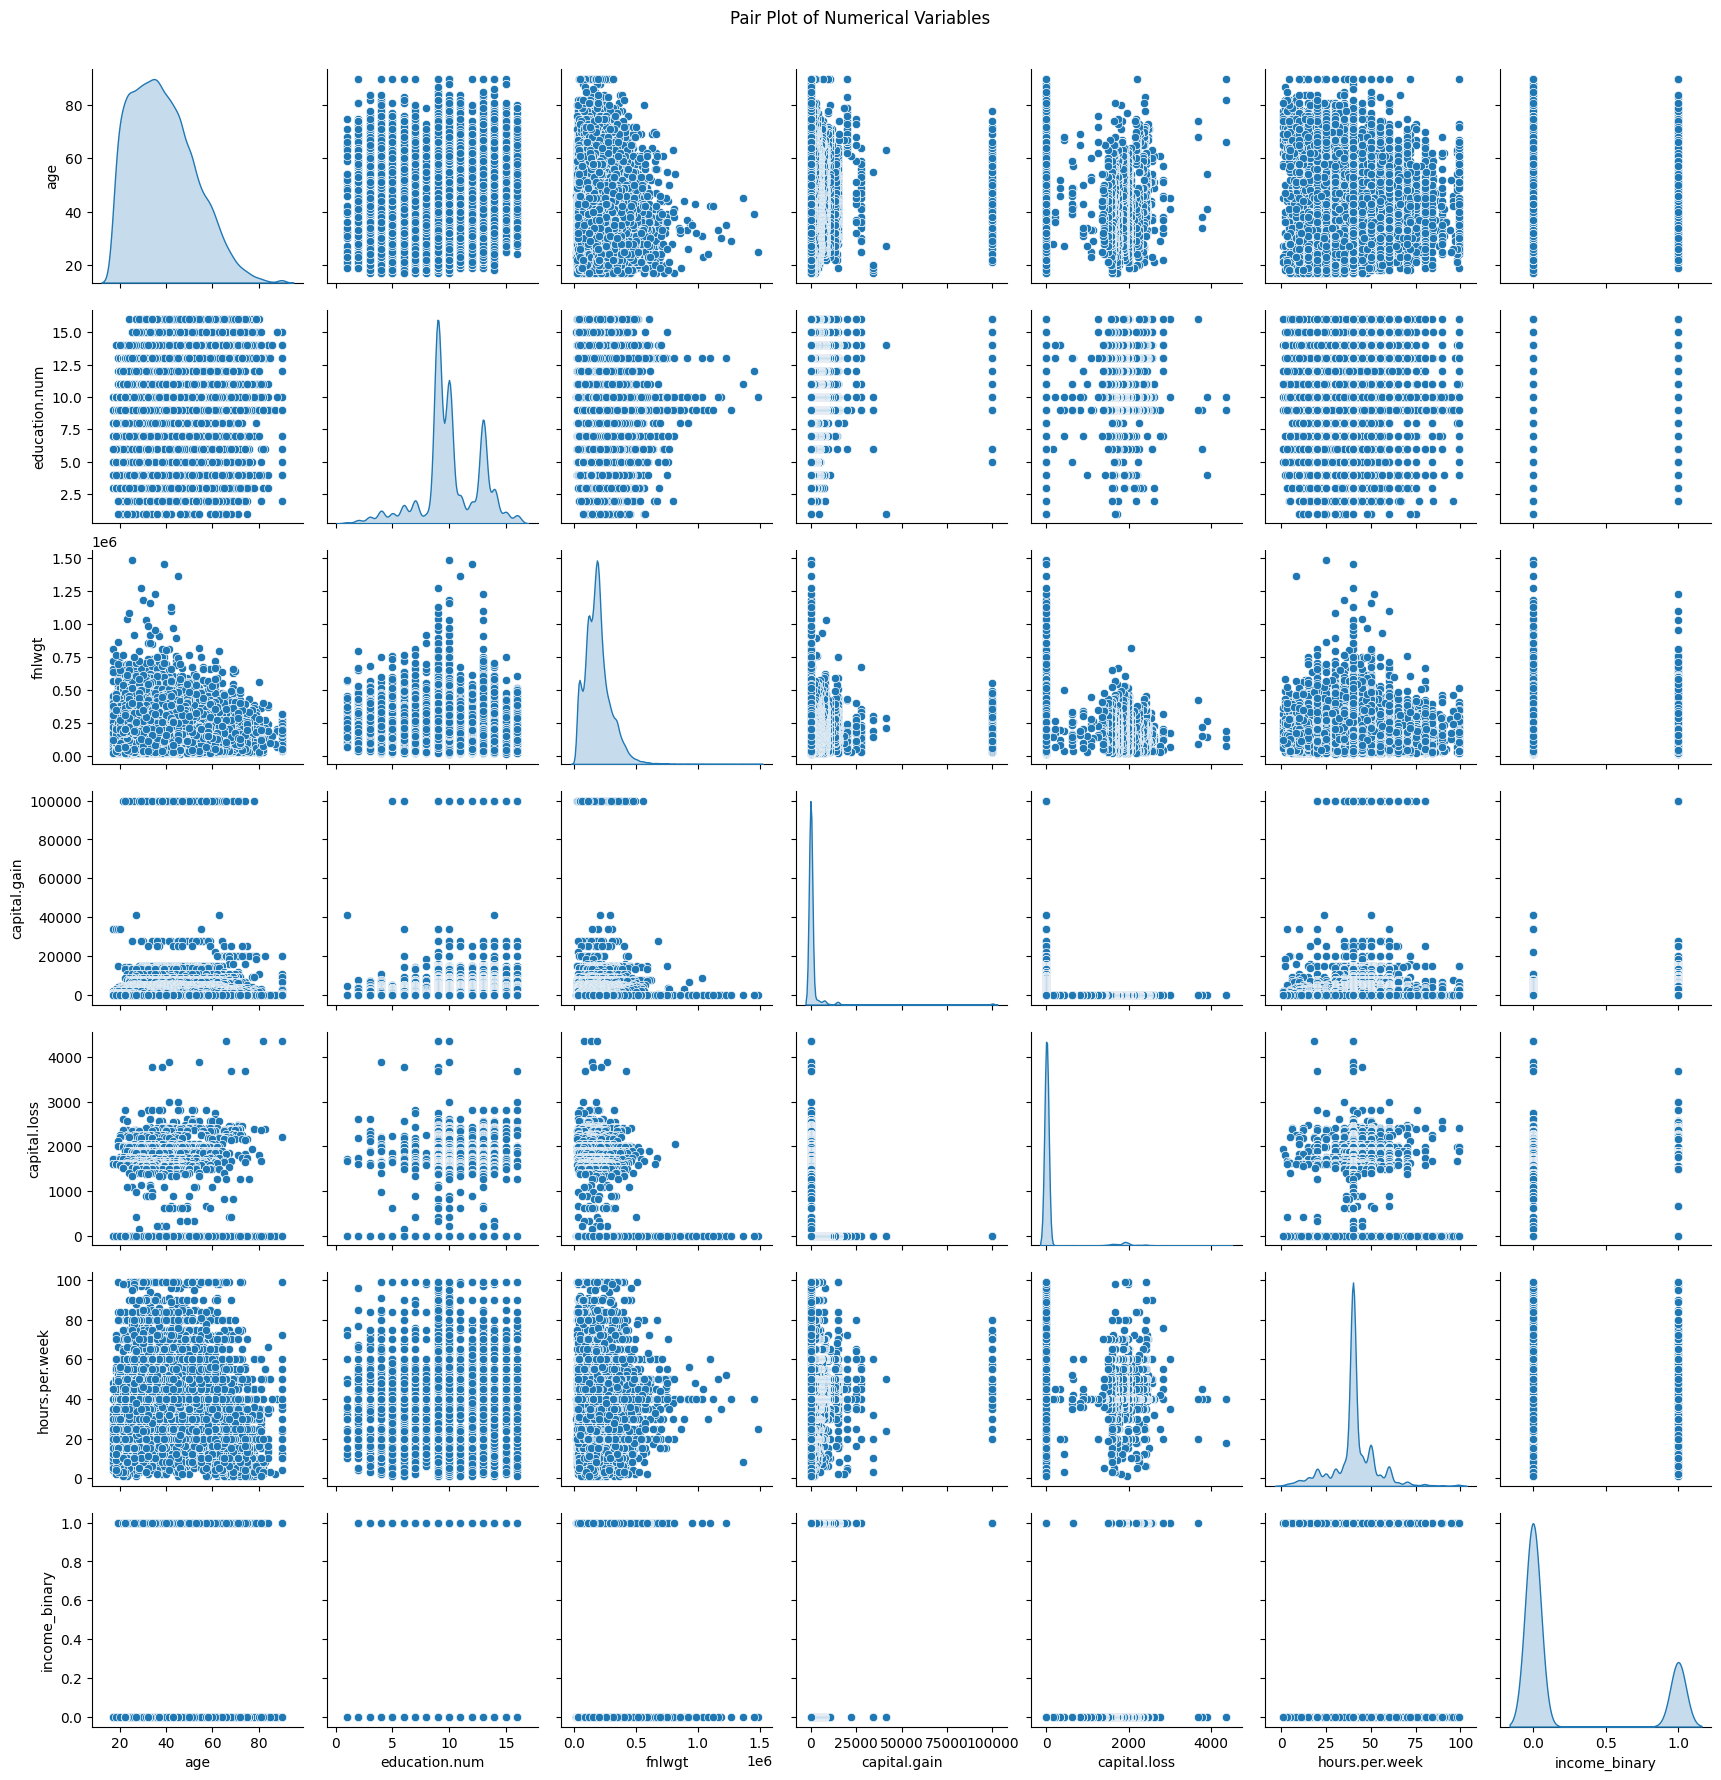

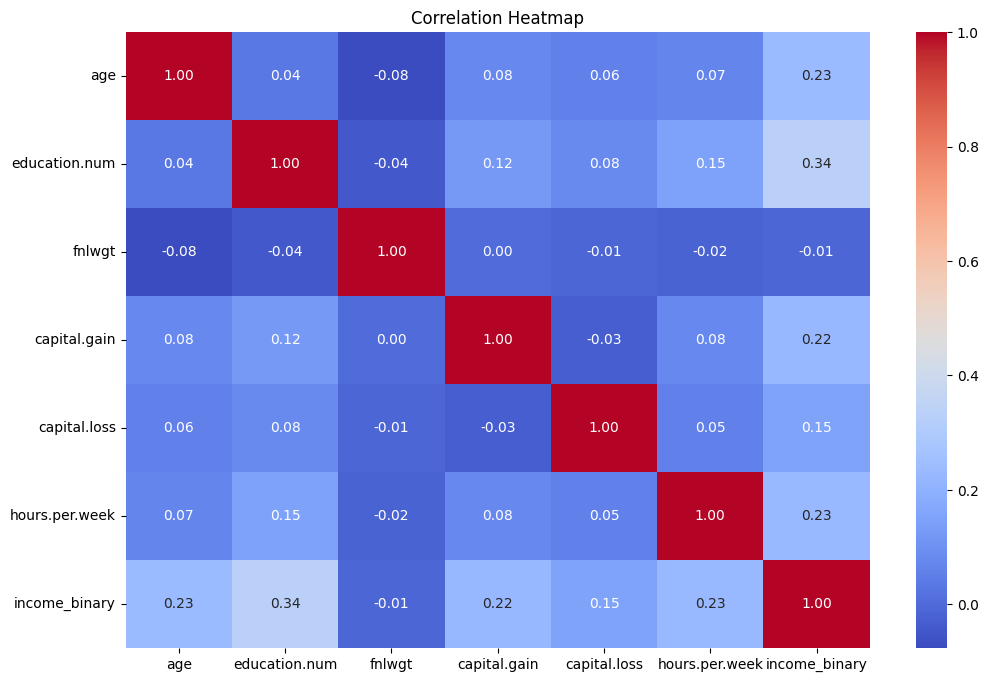

In [ ]:
numerical_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'income_binary']

plt.figure(figsize=(12, 10))
sns.pairplot(df1[numerical_vars], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df1[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



**Conclusion from Pair Plot and Heatmap**


**Pair Plot**


1. Relationships Between Variables: The pair plot showcases scatterplots and distributions for each pair of numerical variables


2. Age and Income: There is a noticeable clustering of individuals earning above $50K in middle age, while younger and older age groups tend to have more individuals earning below $50K.


3. Education and Income: A clear positive trend is observed; individuals with higher education levels are more likely to fall into the higher income category, reinforcing the importance of education.


4. Capital Gains and Income: The pair plot highlights that most individuals with significant capital gains are concentrated in the higher income bracket, suggesting that capital gains play a crucial role in financial success.


5. Hours Worked per Week: The distribution shows that full-time workers (typically around 40 hours) are more likely to earn above $50K, while part-time and lower-hour workers are predominantly in the lower income group.


**Heatmap**


1. Correlation Matrix: The heatmap provides a visual summary of correlations among numerical variables.


2. Strong Correlations: There are strong positive correlations between capital gains and income and moderate correlations between education level and income. This indicates that higher education and successful investments are associated with increased earnings.


3. Weaker Correlations: The correlation between capital losses and income is weak, suggesting that losses do not significantly impact overall income levels for most individuals.

Explained variance by PC1: 0.1791
Explained variance by PC2: 0.1274
Explained variance by PC3: 0.1187
Explained variance by PC4: 0.1146
Explained variance by PC5: 0.1071
Explained variance by PC6: 0.1000
Explained variance by PC7: 0.0956
Explained variance by PC8: 0.0819
Explained variance by PC9: 0.0756


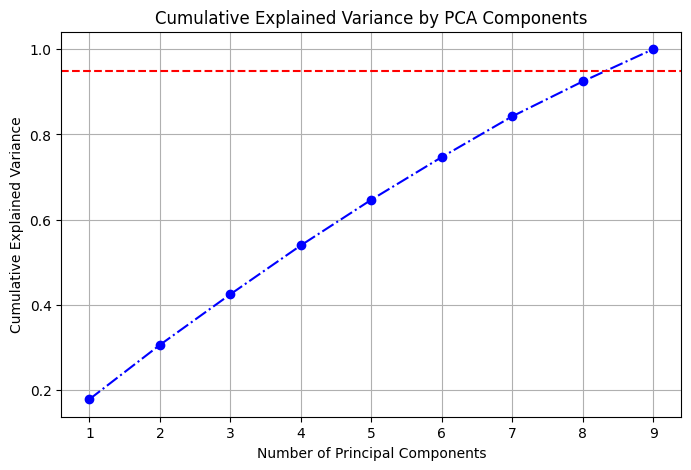

In [ ]:
label_encoder = LabelEncoder()
df1['occupation_encoded'] = label_encoder.fit_transform(df1['occupation'])
df1['marital_status_encoded'] = label_encoder.fit_transform(df1['marital.status'])
df1['sex_encoded'] = label_encoder.fit_transform(df1['sex'])

numeric_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss',
                'hours.per.week', 'occupation_encoded', 'marital_status_encoded', 'sex_encoded']

numeric_df = df1[numeric_vars]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=None)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(explained_variance):
    print(f"Explained variance by PC{i+1}: {var:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-.', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # Add a line for 95% cumulative variance
plt.show()


**Conclusion from PCA (Principal Component Analysis)**


Dimensionality Reduction: PCA effectively reduces the dataset's dimensionality, allowing us to capture the majority of the variance in a lower number of components. This helps simplify the dataset while retaining essential information, making it easier to visualize and analyze.

Explained Variance: The explained variance plot indicates how much information each principal component retains. Typically, the first few components account for a significant portion of the total variance, suggesting that they are critical for understanding the underlying structure of the data.

Component Interpretation: By examining the loadings of the principal components, we can identify which original variables contribute most to each component. For instance:

Components may reveal strong contributions from variables like education, capital gains, and age, highlighting their importance in differentiating between income levels.
Visualization: The scatter plot of the first two principal components often reveals clusters or patterns that correspond to different income levels. This visualization can indicate how well the PCA has separated the groups based on the underlying features.

**My target variable is binary (e.g., income > $50K vs. <= $50K) thus logistic regression is appropriate. It models the probability of the target variable being in a particular class, making it suitable for classification tasks.**

In [ ]:



label_encoder = LabelEncoder()
df1['occupation_encoded'] = label_encoder.fit_transform(df1['occupation'])
df1['marital_status_encoded'] = label_encoder.fit_transform(df1['marital.status'])
df1['sex_encoded'] = label_encoder.fit_transform(df1['sex'])

features = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss',
            'hours.per.week', 'occupation_encoded', 'marital_status_encoded', 'sex_encoded']
target = 'income'

X = df1[features]
y = df1[target].map({'<=50K': 0, '>50K': 1})  # Assuming income is in string format

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 0.8234
Confusion Matrix:
[[4689  287]
 [ 863  674]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4976
           1       0.70      0.44      0.54      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513



**Hyperparameters tuning control the behavior and performance of a machine learning algorithm. By tuning these parameters, we aim to enhance the model's predictive accuracy and ensure it generalizes well to unseen data.**

In [ ]:
X = df1[features]
y = df1[target].map({'<=50K': 0, '>50K': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1'}
Best Cross-Validation Score: 0.8219
Test Set Accuracy: 0.8234
Confusion Matrix:
[[4688  288]
 [ 862  675]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4976
           1       0.70      0.44      0.54      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513

